# Explore simulation : look for trends with increase of baseline given that we know the truth

In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

simDir = '../code/'
date = '190401'
prior='Jeff1'
i = 6000
#fname = date + '_Celerite_sim_w_LSST_ZTF_'+prior+'_'+str(i)+'.npy'
fname = date + '_Celerite_sim_w_LSST_ZTF_Jeff1.npy' # a dictionary 
r = np.load(fname).item()

segments = list(r.keys())
i= 1 

# sdss
d1 = pd.DataFrame.from_dict(r[segments[0]])
t1 = Table.from_pandas(d1)

# sdss-ps1
d2 = pd.DataFrame.from_dict(r[segments[1]])
t2 = Table.from_pandas(d2)

# sdss-ps1-ztf
d3 = pd.DataFrame.from_dict(r[segments[2]])
t3 = Table.from_pandas(d3)

# sdss-ps1-ztf-lsst
d4 = pd.DataFrame.from_dict(r[segments[3]])
t4 = Table.from_pandas(d4)

# join 12
t12 =  join(t1,t2, keys='lcname', table_names=[segments[0] ,segments[1]])

# join 34
t34 =  join(t3,t4, keys='lcname', table_names=[segments[2] ,segments[3]])

# join all 
tall = join(t12,t34,keys='lcname')

asciname = fname[:-4]+'.txt'
print('Saved stacked table as ', asciname)
tall.write(asciname, format='ascii', overwrite=True) # an ASCII AstroPy table 

Saved stacked table as  190401_Celerite_sim_w_LSST_ZTF_Jeff1.txt


In [23]:
fname

'190401_Celerite_sim_w_LSST_ZTF_Jeff1.npy'

sdss
sdss-ps1
sdss-ps1-ztf
sdss-ps1-ztf-lsst
sdss
sdss-ps1
sdss-ps1-ztf
sdss-ps1-ztf-lsst
Using  190401_Celerite_sim_w_LSST_ZTF_Jeff1.npy
Saved as  Simulated_Jeff1-EXP-190401.png


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


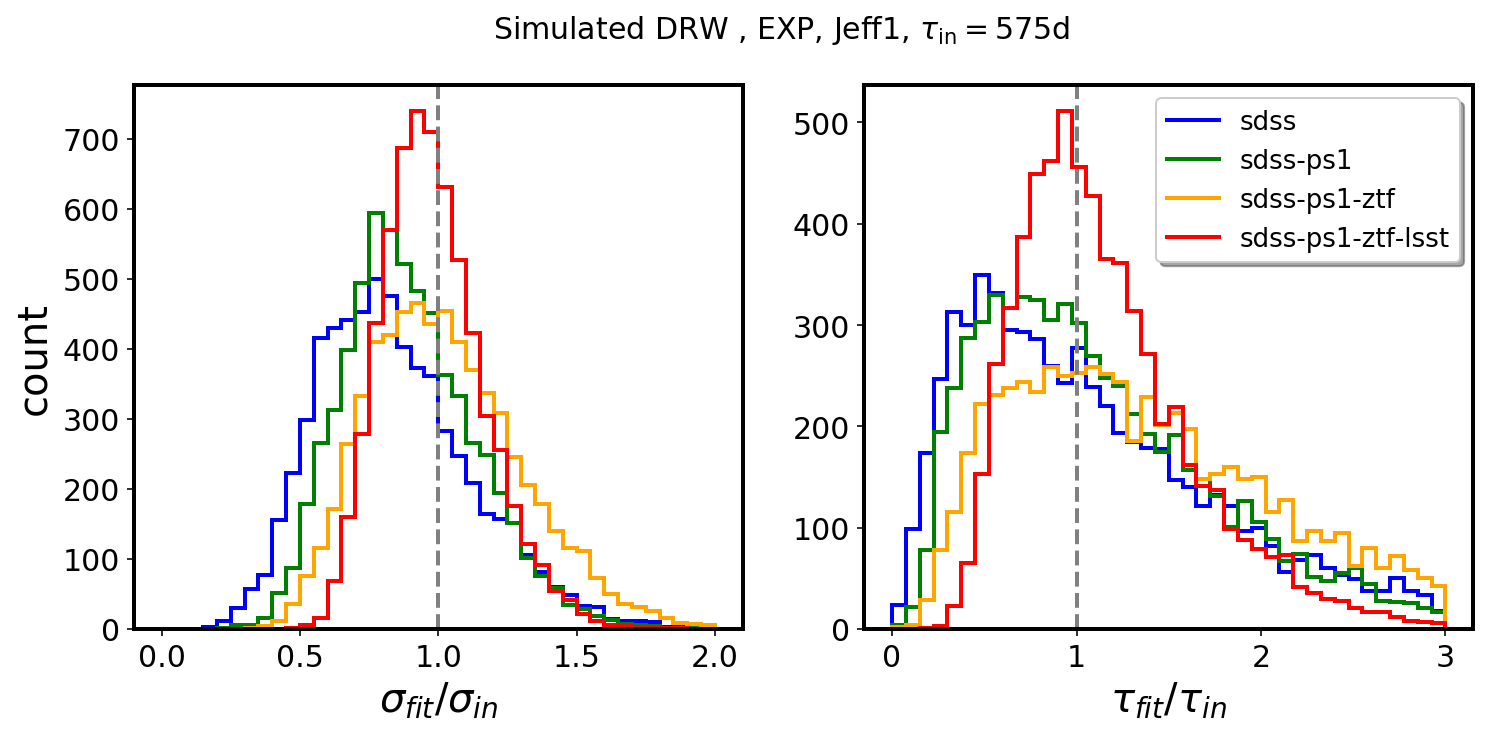

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.lines as mlines
#tall = t12 

# plot 

# select which results to plot 
fit = 'EXP'# 'MAP'

# which segments are we plotting
segs = segments[:4]
# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 

fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']

lw = 2 

i = 0 
ax_legend_handles =  []
for s in segs: 
    print(s)
    ax[0].hist(tall['sigma'+fit+'_'+s] / sigma_in , histtype='step', 
               bins=40, range=[0,2], color = colors[i],lw=lw) 
    ax[0].set_xlabel(r'$\sigma_{fit} / \sigma_{in}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s,lw=lw)
    ax_legend_handles.append(line)
    i += 1 

#ax[0].legend(loc='upper right', handles = ax_legend_handles,
#             bbox_to_anchor=(1.0, 1.0),
#             ncol=1, fancybox=True, shadow=True, fontsize=13 ) 
i = 0 
ax_legend_handles =  []
for s in segs: 
    print(s)
    ax[1].hist(tall['tau'+fit+'_'+s] / float(tau_in) , histtype='step', 
               bins=40, range=[0,3], color = colors[i],lw=lw) 
    ax[1].set_xlabel(r'$\tau_{fit} / \tau_{in}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s,lw=lw)
    ax_legend_handles.append(line)
    i += 1 

ax[1].legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True, fontsize=13 ) 
    
             
ax[0].axvline(1, lw=2, ls='--', c='grey')
ax[1].axvline(1, lw=2, ls='--', c='grey')

ax[0].set_ylabel('count')

fig.suptitle( 'Simulated DRW , '+ fit +', '+ prior+', '+\
             r'$\tau_{\mathrm{in}}=575 \mathrm{d}$' , 
             fontsize = 15)

figname = 'Simulated_'+prior+'-'+fit+'-'+date+'.png' 
print('Using ', fname)
print('Saved as ', figname)
plt.savefig(figname, bbox_inches="tight", dpi=100)

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median np.log10(sigma_sdss-ps1/sigma_sdss)= 0.010534141798940085
Mean np.log10(sigma_sdss-ps1/sigma_sdss)= 0.03547896693428825
Median np.log10(tau_sdss-ps1/tau_sdss)= -0.017335069878282948
Mean np.log10(tau_sdss-ps1/tau_sdss)= 0.03398425244429979


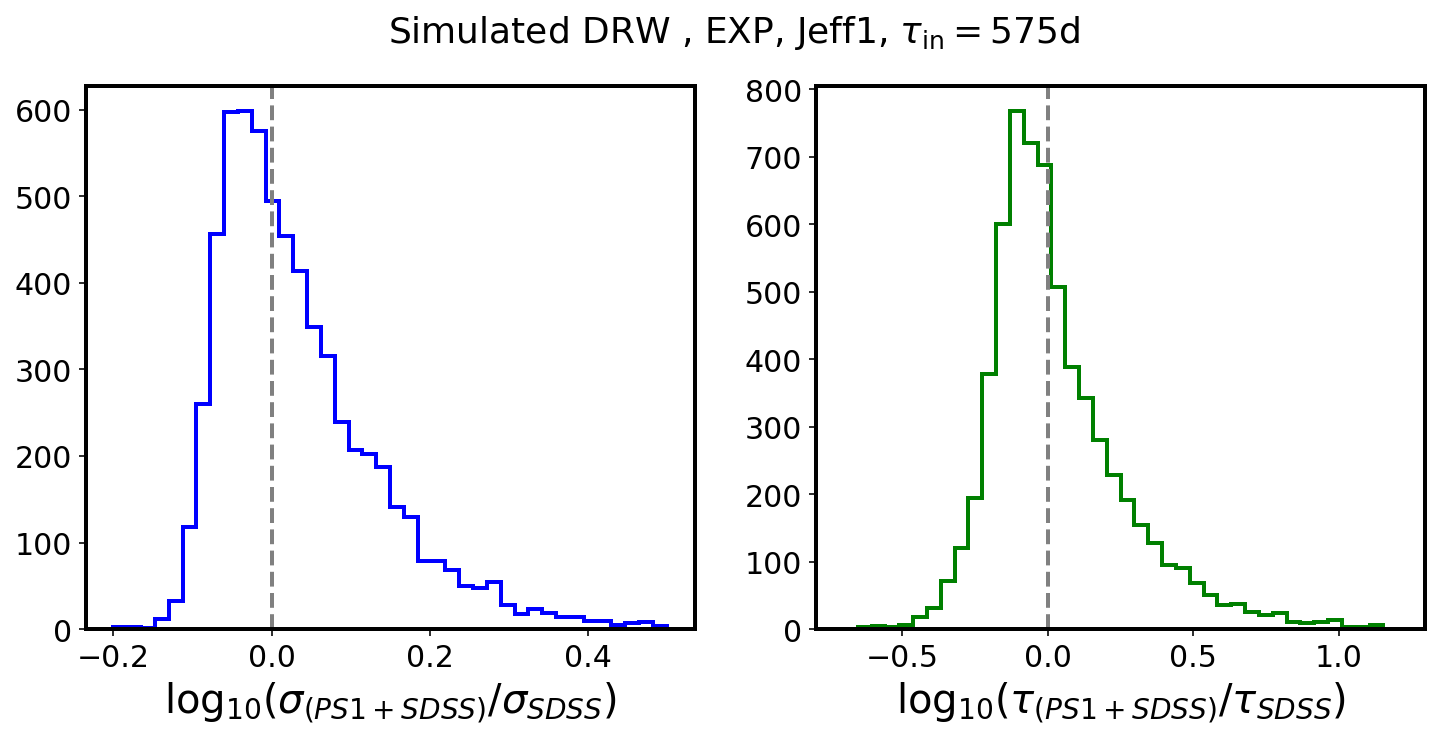

In [4]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

fit = 'EXP'

# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 


fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles =  []



labels =  {'sigma': r'$\log_{10}{(\sigma_{(PS1+SDSS)} / \sigma_{SDSS})}$',
         'tau':r'$\log_{10}{(\tau_{(PS1+SDSS)} / \tau_{SDSS})}$'}

i = 0
ranges = {'sigma':[-0.2,0.5], 'tau':[-0.7,1.2]}
for q in ['sigma','tau']:
    # selection : 
    m = (tall['tau'+fit+'_sdss-ps1'] > 5) & (tall['tau'+fit+'_sdss'] > 5) 
    np.sum(m)
    # plot 
    x = tall[q+fit+'_sdss-ps1'][m] /  tall[q+fit+'_sdss'][m]
    ax[i].hist(np.log10(x) , histtype='step', 
               bins=40, range=ranges[q], color = colors[i],
               lw=2) 
    print('Median np.log10('+q+'_sdss-ps1/'+q+'_sdss'+')=', np.median(np.log10(x)))
    print('Mean np.log10('+q+'_sdss-ps1/'+q+'_sdss'+')=', np.mean(np.log10(x)))
    ax[i].set_xlabel(labels[q])
    ax[i].axvline(0, lw=2, ls='--', c='grey')

    i += 1 

fig.suptitle('Simulated DRW , '+ fit +', '+ prior+', '+\
             r'$\tau_{\mathrm{in}}=575 \mathrm{d}$' , fontsize=18
             )
plt.savefig('Celerite_simulated_DRW_EXP_compare_tau.png', bbox_inches="tight",
           dpi=150)

Plot the timescales as a hexbin : 

6342 6444
Celerite_190401_timescales_sim.png


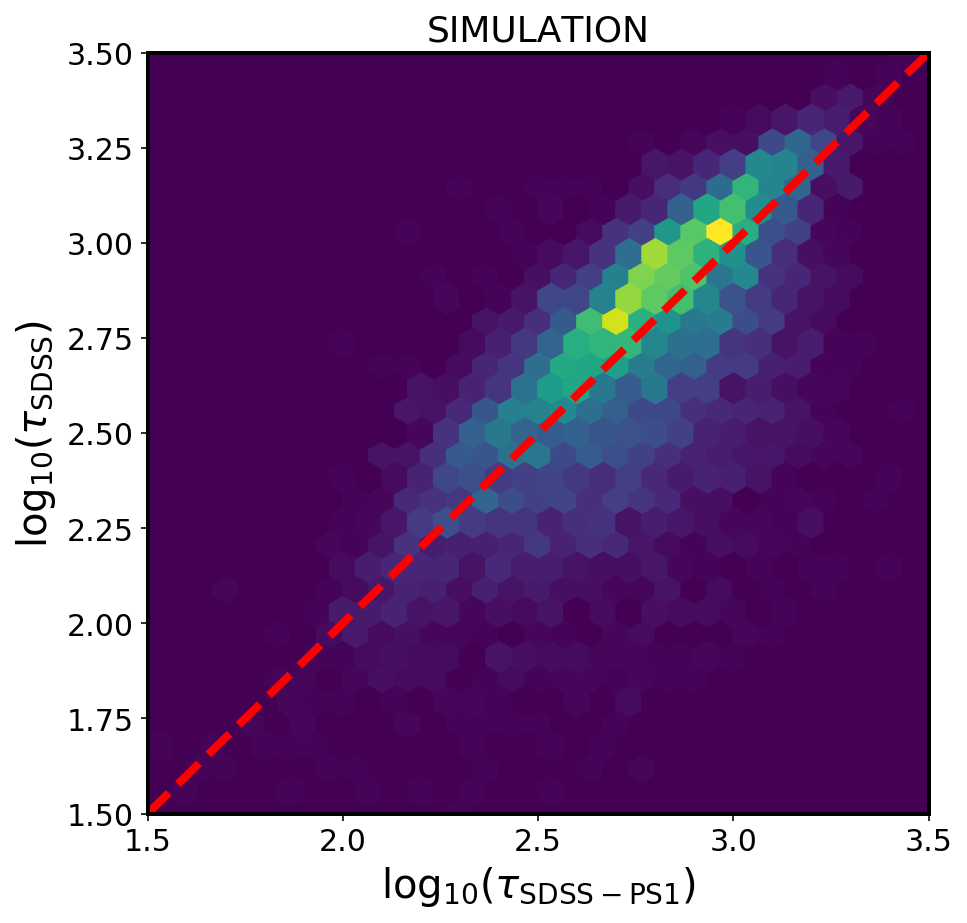

In [15]:
%matplotlib inline
fig,ax = plt.subplots(1,1, figsize=(7,7))
fit = 'EXP'
# selection : 
m = (tall['tau'+fit+'_sdss-ps1'] > 5) & (tall['tau'+fit+'_sdss'] > 5) 
print(np.sum(m), len(m))
# plot 
ax.hexbin(np.log10(tall['tauEXP_sdss-ps1'][m]), 
          np.log10(tall['tauEXP_sdss'][m]), extent=(1.5,3.5,1.5,3.5), 
         gridsize=30)
ax.set_xlabel(r'$\log_{10}{(\tau_{\mathrm{SDSS-PS1}})}$')
ax.set_ylabel(r'$\log_{10}{(\tau_{\mathrm{SDSS}})}$')
ax.set_title('SIMULATION', fontsize=18)
x  = np.linspace(1.5,3.5,100)
ax.plot(x,x,ls='--',lw=4, color='red')
figname = 'Celerite_'+fname[:6]+'_timescales_sim.png'
print(figname)
plt.savefig(figname, bbox_inches='tight', dpi=100)

In [12]:
fname

'190401_Celerite_sim_w_LSST_ZTF_Jeff1.npy'

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in greater
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


sdss
0 mean:  -0.07151206238517745 median:  -0.0677991632872475
1 mean:  -0.10437938856912002 median:  -0.06638611591548764
2 mean:  -0.09896140533578994 median:  -0.09261362823051197
3 mean:  -0.054898685901225035 median:  -0.017558696142598966
sdss-ps1
0 mean:  -0.053025221673039094 median:  -0.05007635361241246
1 mean:  -0.052655652657676084 median:  -0.02640218939501192
2 mean:  -0.06348243840150167 median:  -0.06061550317710093
3 mean:  -0.02091443345692524 median:  0.0027573407112767836
sdss-ps1-ztf
0 mean:  -0.0524248521357437 median:  -0.049900619468722734
1 mean:  0.09255356897826869 median:  0.11709471152043203
2 mean:  -0.004918454117287449 median:  -0.0013254047658898414
3 mean:  0.09501279603691243 median:  0.11643891858834099
sdss-ps1-ztf-lsst
0 mean:  -0.029227420108936635 median:  -0.029195267690740524
1 mean:  0.021433396971370092 median:  0.01869756856745456
2 mean:  -0.01480857729860124 median:  -0.01618518321060601
3 mean:  0.02883768562067073 median:  0.02633788263

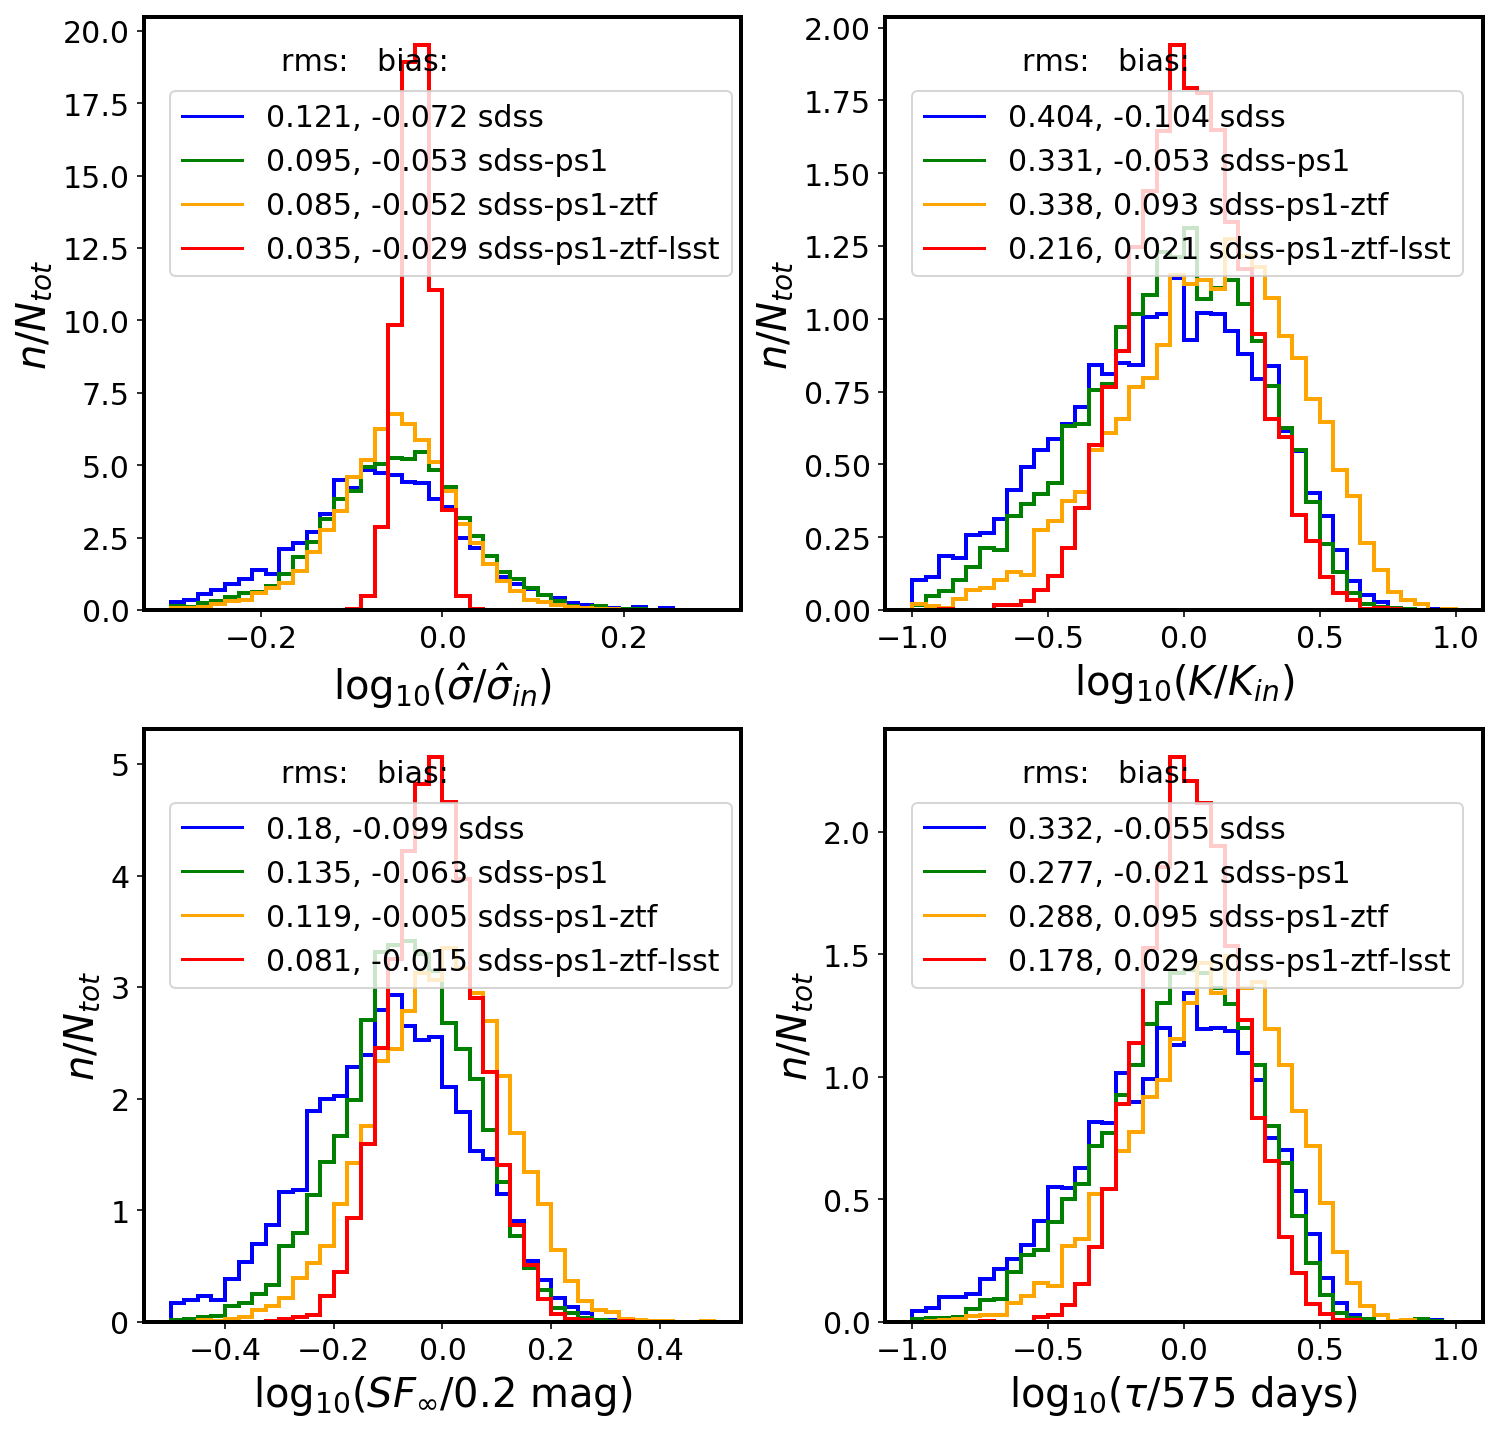

In [5]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
# validate that the results including LSST  are consistent with Fig.18 from MacLeod+2011: 
import seaborn as sns 
import matplotlib.lines as mlines
current_palette = sns.color_palette()

# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 
sigma_hat_in = sigma_in * np.sqrt(2) / np.sqrt(tau_in) #  mag / sqrt(days) 
K_in = tau_in * np.sqrt(SF_inf)

# which segments are we plotting
segs = segments[:4]


# define plotting space 
fig,axs = plt.subplots(2,2, figsize=(12,12))
ax  = np.ravel(axs)
def rms(x):
    return np.sqrt(np.mean(np.square(x)))
    
    
# define color dic .... 
# cdic = {}
# for i in range(len(segs)):
#     color = current_palette[i] 
#     print(segs[i],i,color)
#     cdic[segs[i]] = color 
cdic= {'sdss':'blue',
         'sdss-ps1':'green', 
         'sdss-ps1-ztf':'orange', 
         'sdss-ps1-ztf-lsst':'red'}

x_label = {0:r'$\log_{10}{(\hat{\sigma}/\hat{\sigma}_{in})}$',
           1:r'$\log_{10}{(K / K_{in})}$',
           2:r'$\log_{10}{(SF_{\infty} / 0.2 }$'+' mag)',
           3:r'$\log_{10}{(\tau / }$'+'575 days)'}
x_range = {0:[-0.3,0.3],
          1:[-1,1],
          2:[-0.5,0.5],
          3:[-1,1]}

ax_legend_handles = {0:[], 1:[], 2:[], 3:[]}

fit = 'EXP'
for s in segs : 
    # two independent fitted quantities
    tau = np.asarray(tall['tau'+fit+'_'+s])
    sigma = np.asarray(tall['sigma'+fit+'_'+s])

    m = tau > 3  # remove spurious fits 

    # other derived, dependent quantities 
    SF_inf_fit = sigma * np.sqrt(2)
    sigma_hat = SF_inf_fit / np.sqrt(tau)
    K = tau * np.sqrt(SF_inf_fit)


    x_plot = {0:np.log10(sigma_hat[m] / sigma_hat_in ),
              1:np.log10(K[m]/K_in),
              2:np.log10(SF_inf_fit[m] / SF_inf),
              3:np.log10(tau[m] / tau_in)
             }

    print(s)
    for i in range(len(ax)):
        x = x_plot[i]
        ax[i].hist(x, histtype='step',
                  bins=40, range=x_range[i],normed=True, lw=2,
                  color = cdic[s], log=False)
        #ax[i].text(0.6, 0.8, 'rms = '+str(rms(x))[:6], transform = ax[i].transAxes,
        #          fontsize=16, )
        ax[i].set_xlabel(x_label[i])
        ax[i].set_ylabel(r'$n/N_{tot}$')
        bias = np.mean(x)
        print(i, 'mean: ', bias, 'median: ', np.median(x))
        line = mlines.Line2D([], [], color=cdic[s],label=str(np.around(rms(x),3))+\
                             ', '+str(np.around(bias,3))+' '+s )
        ax_legend_handles[i].append(line)
    
# add legends, axis props 
for i in range(len(ax)):
    ax[i].text(0.23, 0.91, 'rms:   bias:',transform=ax[i].transAxes, fontsize=15)
    leg = ax[i].legend(loc='upper left', handles = ax_legend_handles[i],
                bbox_to_anchor=(0.02, 0.9), fontsize=15,fancybox=True)
    
fig.subplots_adjust(wspace=0.24)
#fig.suptitle(s, fontsize=16)
print('Using ', fname)

figname = 'macleod2011_Fig18_'+prior+'-'+date+'.png'
print('Saved the plot as ', figname)
plt.savefig(figname,
            bbox_inches='tight', dpi=100)

Explore the rho space tested by the simulated data... We know $\rho_{input} = 575 d / baseline$, and we know the fitted $\rho_{output} = \tau_{fit} / baseline $... This would show us which part of Fig.2 is explored by the simulation 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


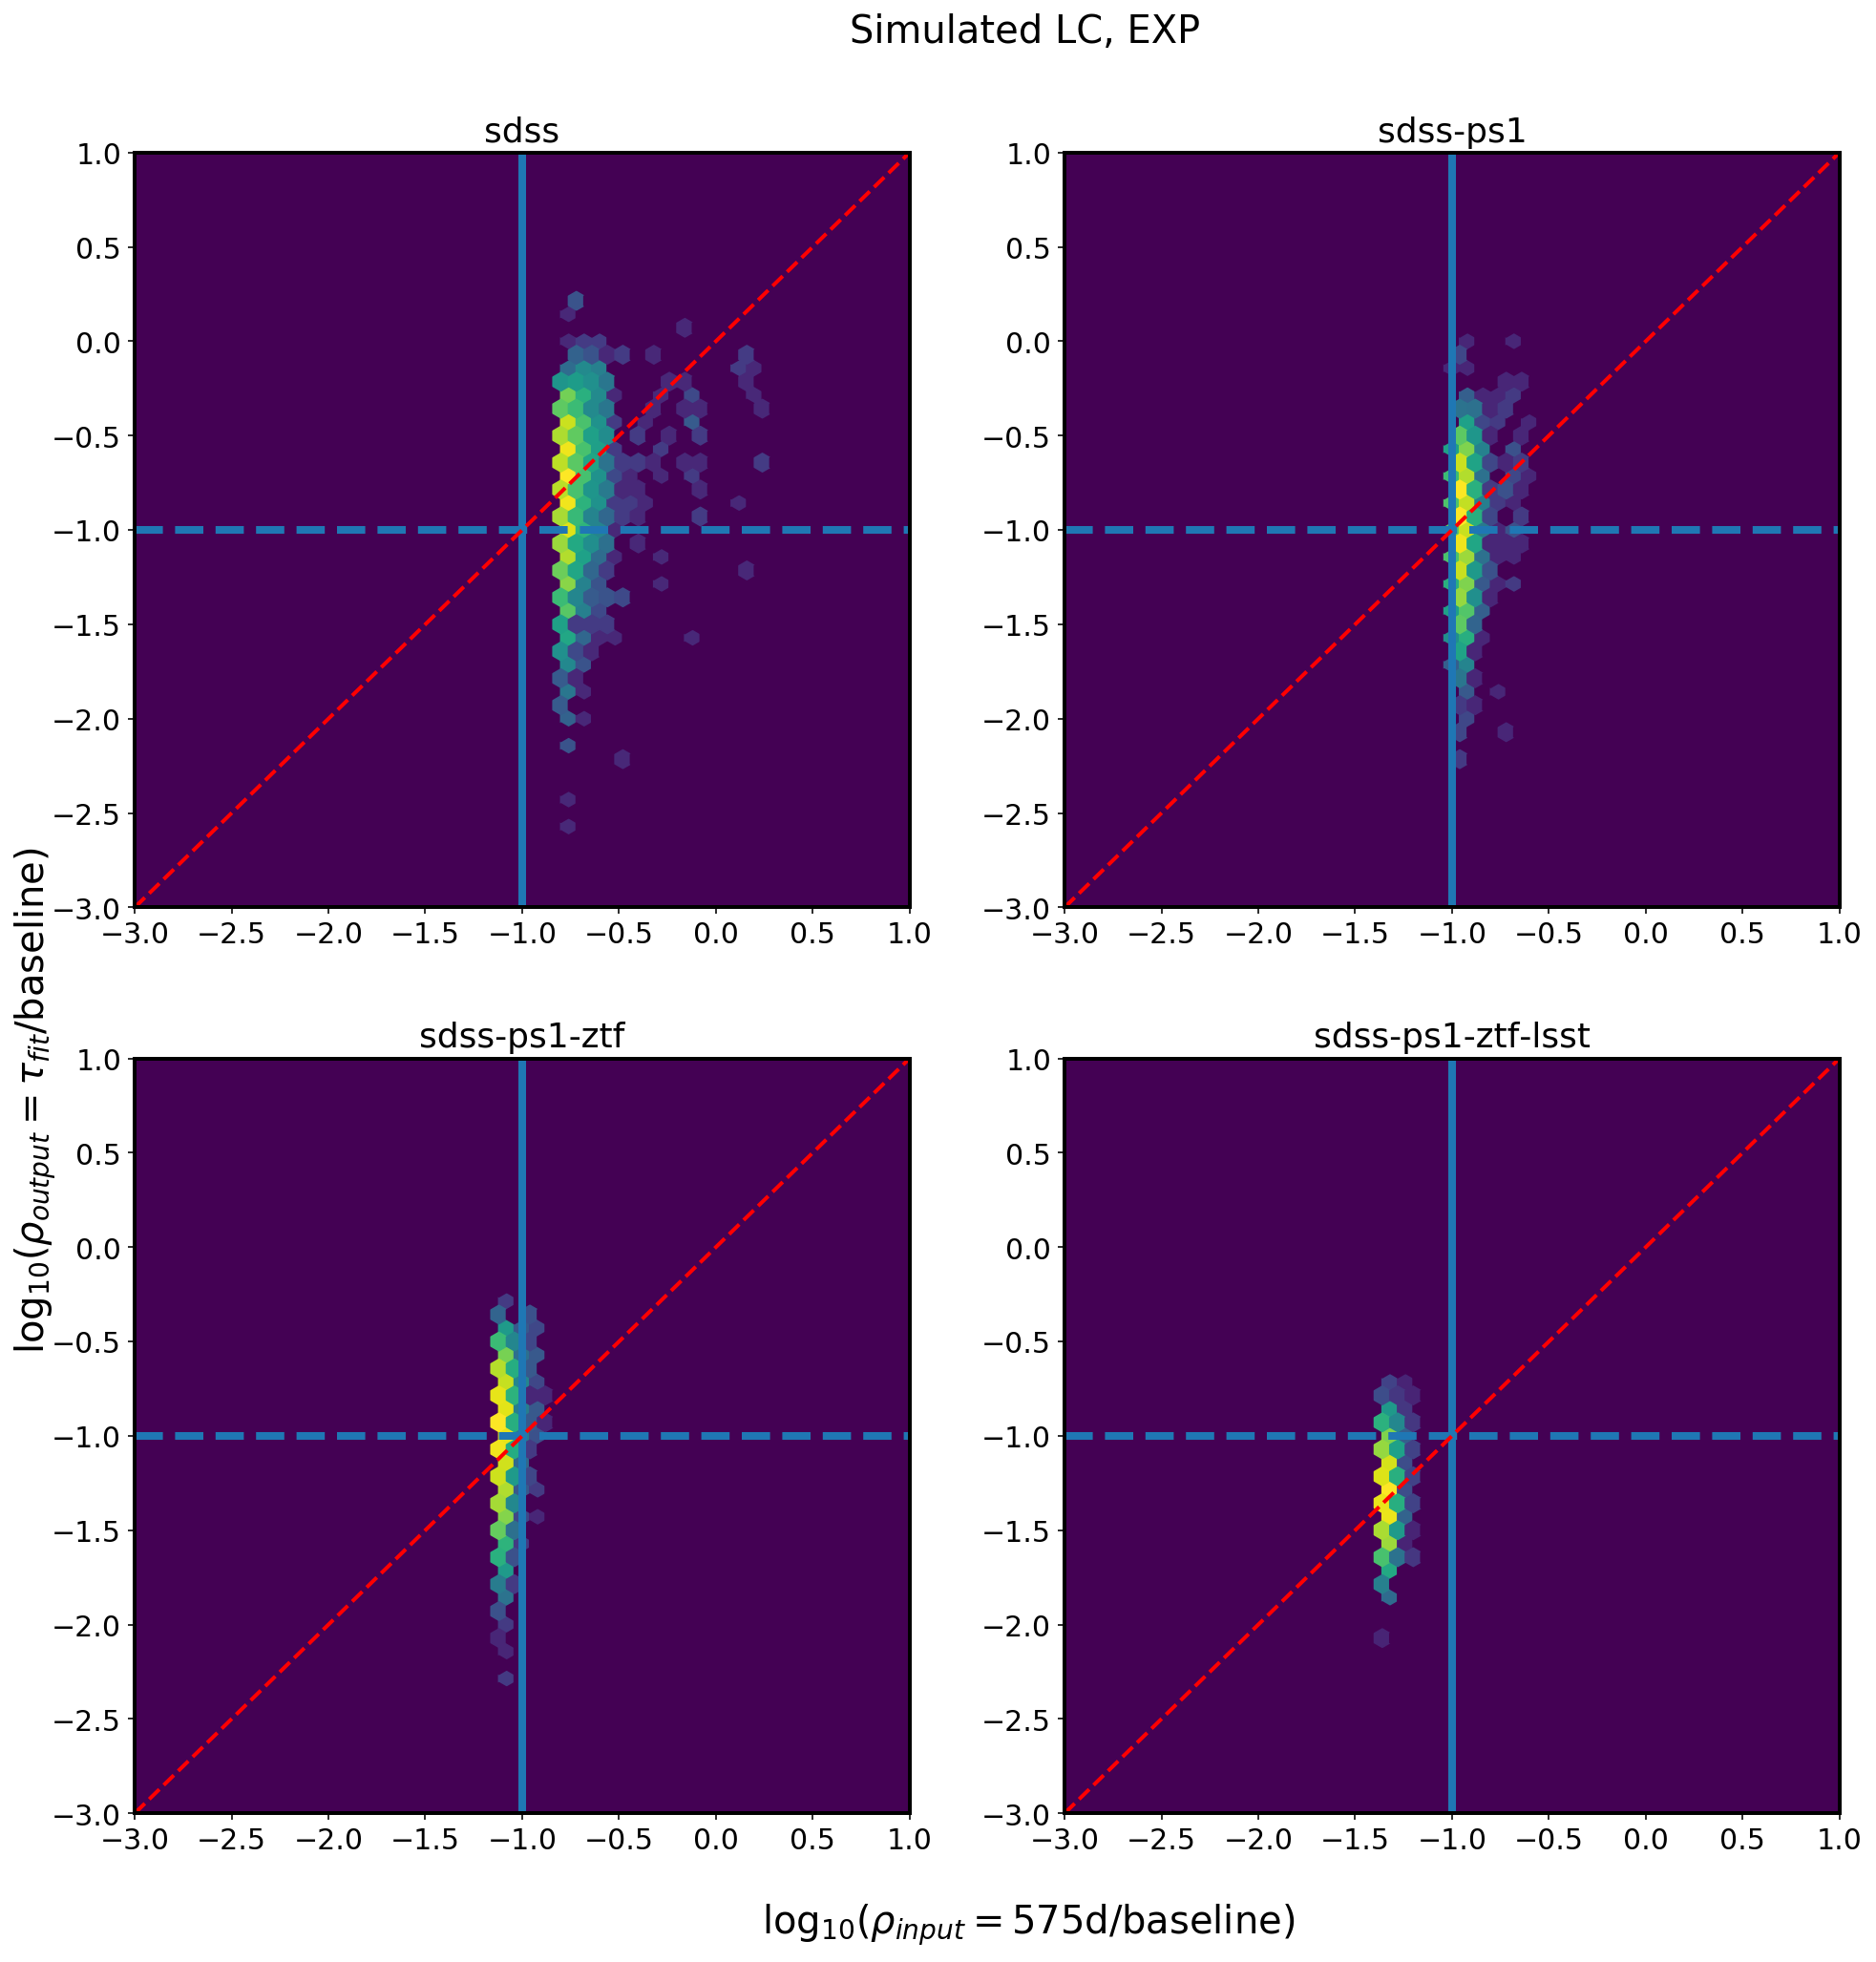

In [11]:
%matplotlib inline

fig,axs = plt.subplots(2,2,figsize=(16,16))
ax = np.ravel(axs)
i = 0 
fit = 'EXP'

for s in segs :
    tall['tau'+fit+'_'+s]
    
    bad = tall['tau'+fit+'_'+s].mask == True 
    tall[bad] = 0 
    rho_input = 575 /  tall['length_'+s]
    rho_output = tall['tau'+fit+'_'+s] / tall['length_'+s]

    ax[i].hexbin(np.log10(rho_input), np.log10(rho_output), 
                 extent=[-3,1, -3,1], bins='log', cmap='viridis', gridsize=50
             )#, label=s)
    ax[i].axhline(-1, lw=4, ls='--')
    ax[i].axvline(-1, lw=4, ls='-')
    ax[i].set_title(s)
    x = np.linspace(-3,1,100)
    ax[i].plot(x,x, ls='--', lw=2, c='red')
    i += 1 
fig.text(0.45,0.93, 'Simulated LC, ', fontsize=20)
fig.text(0.41,0.07,r'$\log_{10}{(\rho_{input} = 575 \mathrm{d} / \mathrm{baseline})}$', 
          fontsize=20)
fig.text(0.07,0.55 , r'$\log_{10}{(\rho_{output} = \tau_{fit} / \mathrm{baseline})}$', 
         fontsize=20,rotation=90,)
plt.savefig('simulated_LC_Fig2_space.png', bbox_inches='tight')